# Problem Statement:

##                                   Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
### 1. Problem Statement: 


a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

# Downlaod Files:

* https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
* https://github.com/dsrscientist/dataset3

In [205]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

#Import zscore
from scipy.stats import zscore

#Import Power Transform
from sklearn.preprocessing import PowerTransformer

#Import Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

#Import StandardScaler
from sklearn.preprocessing import StandardScaler

#Improt Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import SMOTE
from imblearn.over_sampling import SMOTE

#Import PCA
from sklearn.decomposition import PCA

#Import Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Importing Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing Evaluation metrics for Classification models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split

#Importing Evaluation metrics for Regression models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Importing GridSearchCV to Tune model.
from sklearn.model_selection import GridSearchCV

#Import pickle
import pickle

from yellowbrick.regressor import PredictionError, ResidualsPlot

In [102]:
#Read dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
pd.set_option('display.max_columns', None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Exploratory Data Analysis

In [103]:
#Checking shape of the dataset
df.shape

(8425, 23)

* Dataset contains 8425 rows and 23 columns.

In [104]:
#Checking columns of the dataset
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [105]:
#Checking info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

* There are 7 object type and 16 float type features present in the dataset. 
* Also, seeing some missing values present in the dataset.

In [106]:
#Checking for null values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

* There are many missing values in the dataset which will handle in the further process.

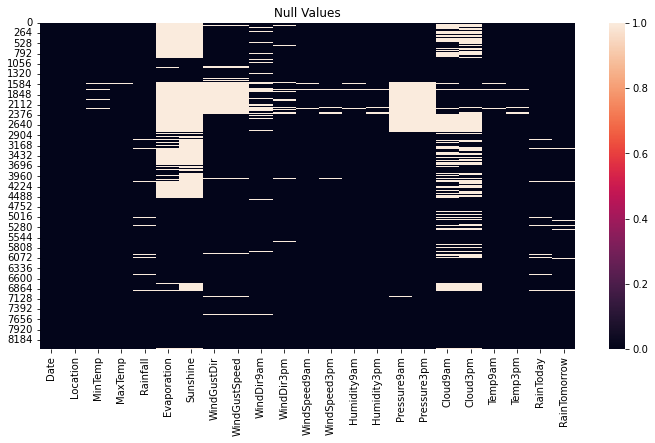

In [107]:
#Visualizing null values
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

* Heatmap clearly shows the missing values present in each columns.
* Except date and location all features have missing values.

In [108]:
#Checking datatypes of each features
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

* Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow are oject datatypes.
* MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am and Temp3pm are float data types.

In [109]:
#Will devide features into categorical and numerical columns
num_cols = []
cat_cols = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [110]:
#Checking numerical features
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [111]:
#Checking categorical columns
cat_cols

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

# Feature Engineering

In [112]:
#Will change Date feature into Day/Month/Year format
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [113]:
#Next droping date column
df = df.drop(['Date'], axis = 1)

In [114]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


# Imputation Technique to Remove Null Values

In [115]:
#Checkinf skewness of the dataset to finalize which imputation technique we should use
df.skew()

MinTemp          -0.089588
MaxTemp           0.379297
Rainfall         13.028837
Evaporation      10.710605
Sunshine         -0.519717
WindGustSpeed     0.711103
WindSpeed9am      0.956250
WindSpeed3pm      0.491069
Humidity9am      -0.255843
Humidity3pm       0.117563
Pressure9am      -0.022133
Pressure3pm      -0.009385
Cloud9am         -0.309417
Cloud3pm         -0.232598
Temp9am          -0.014699
Temp3pm           0.395061
Year              0.418663
Month             0.039388
Day               0.004260
dtype: float64

* Skewness present in Rainfall, Evaporation, WindGustSpeed and WindSpeed9am. We can replace it with meadin and rest feature will impute with mean.

In [116]:
#Replacing NaN values in columns having skewness
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())

In [117]:
#Replacing NaN values in columns without skewness
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [118]:
#Reassigning features to the Cat_cols list
cat_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [119]:
#Checking null values of categorical columns
df[cat_cols].isnull().sum()

Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [120]:
#Replacing null vaalues of categorical columns with mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [121]:
#Checking null values again
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

* All the null values have been taken care off.

In [122]:
#Checking stats of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8425.0,13.193305,5.379488,-2.0,9.300000,13.200000,17.3,28.5
MaxTemp,8425.0,23.859976,6.114516,8.2,19.300000,23.300000,28.0,45.5
Rainfall,8425.0,2.725982,10.319872,0.0,0.000000,0.000000,0.8,371.0
Evaporation,8425.0,5.060332,3.871619,0.0,4.000000,4.600000,5.2,145.0
Sunshine,8425.0,7.632205,2.825451,0.0,7.632205,7.632205,8.9,13.9
WindGustSpeed,8425.0,40.036320,13.781296,7.0,31.000000,39.000000,48.0,107.0
WindSpeed9am,8425.0,13.840000,10.128896,0.0,6.000000,13.000000,20.0,63.0
WindSpeed3pm,8425.0,18.533662,9.704759,0.0,11.000000,19.000000,24.0,83.0
Humidity9am,8425.0,67.822496,16.774231,10.0,56.000000,68.000000,80.0,100.0
Humidity3pm,8425.0,51.249790,18.311894,6.0,39.000000,51.000000,63.0,99.0


* All 8425 rows have data for all the features means no missing values.
* In many columns skewness are present.

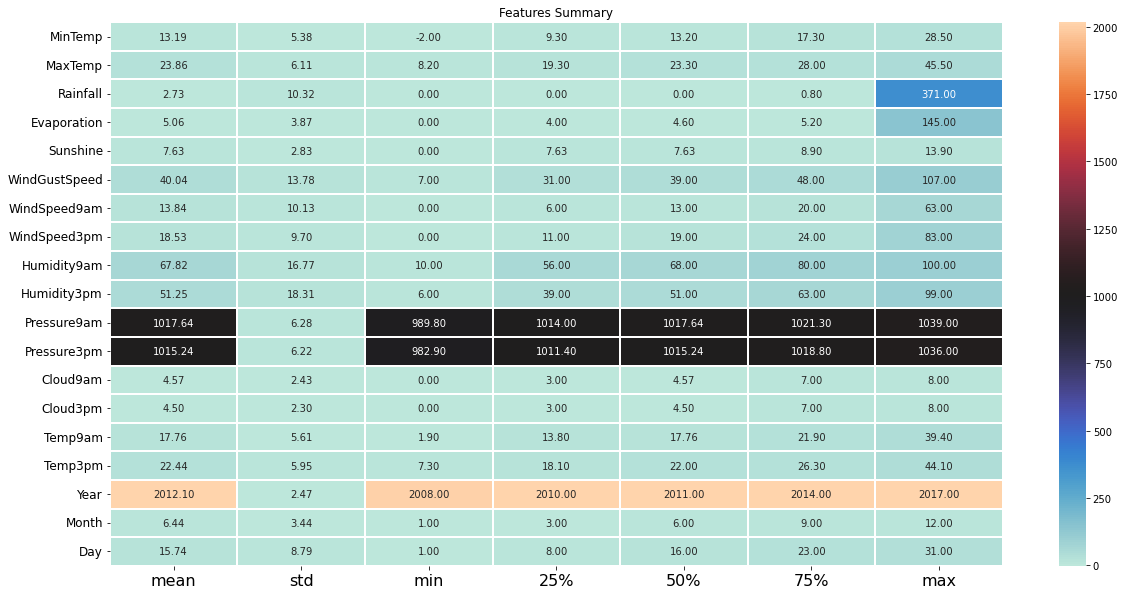

In [123]:
#Heatmap of describe function
plt.figure(figsize = (20,10))
sns.heatmap(round(df.describe()[1:].transpose(), 2), linewidth = 2, annot = True, fmt = '.2f', cmap = 'icefire')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 12)
plt.title('Features Summary')
plt.show()

# Data Visualization (Univariate Analysis)

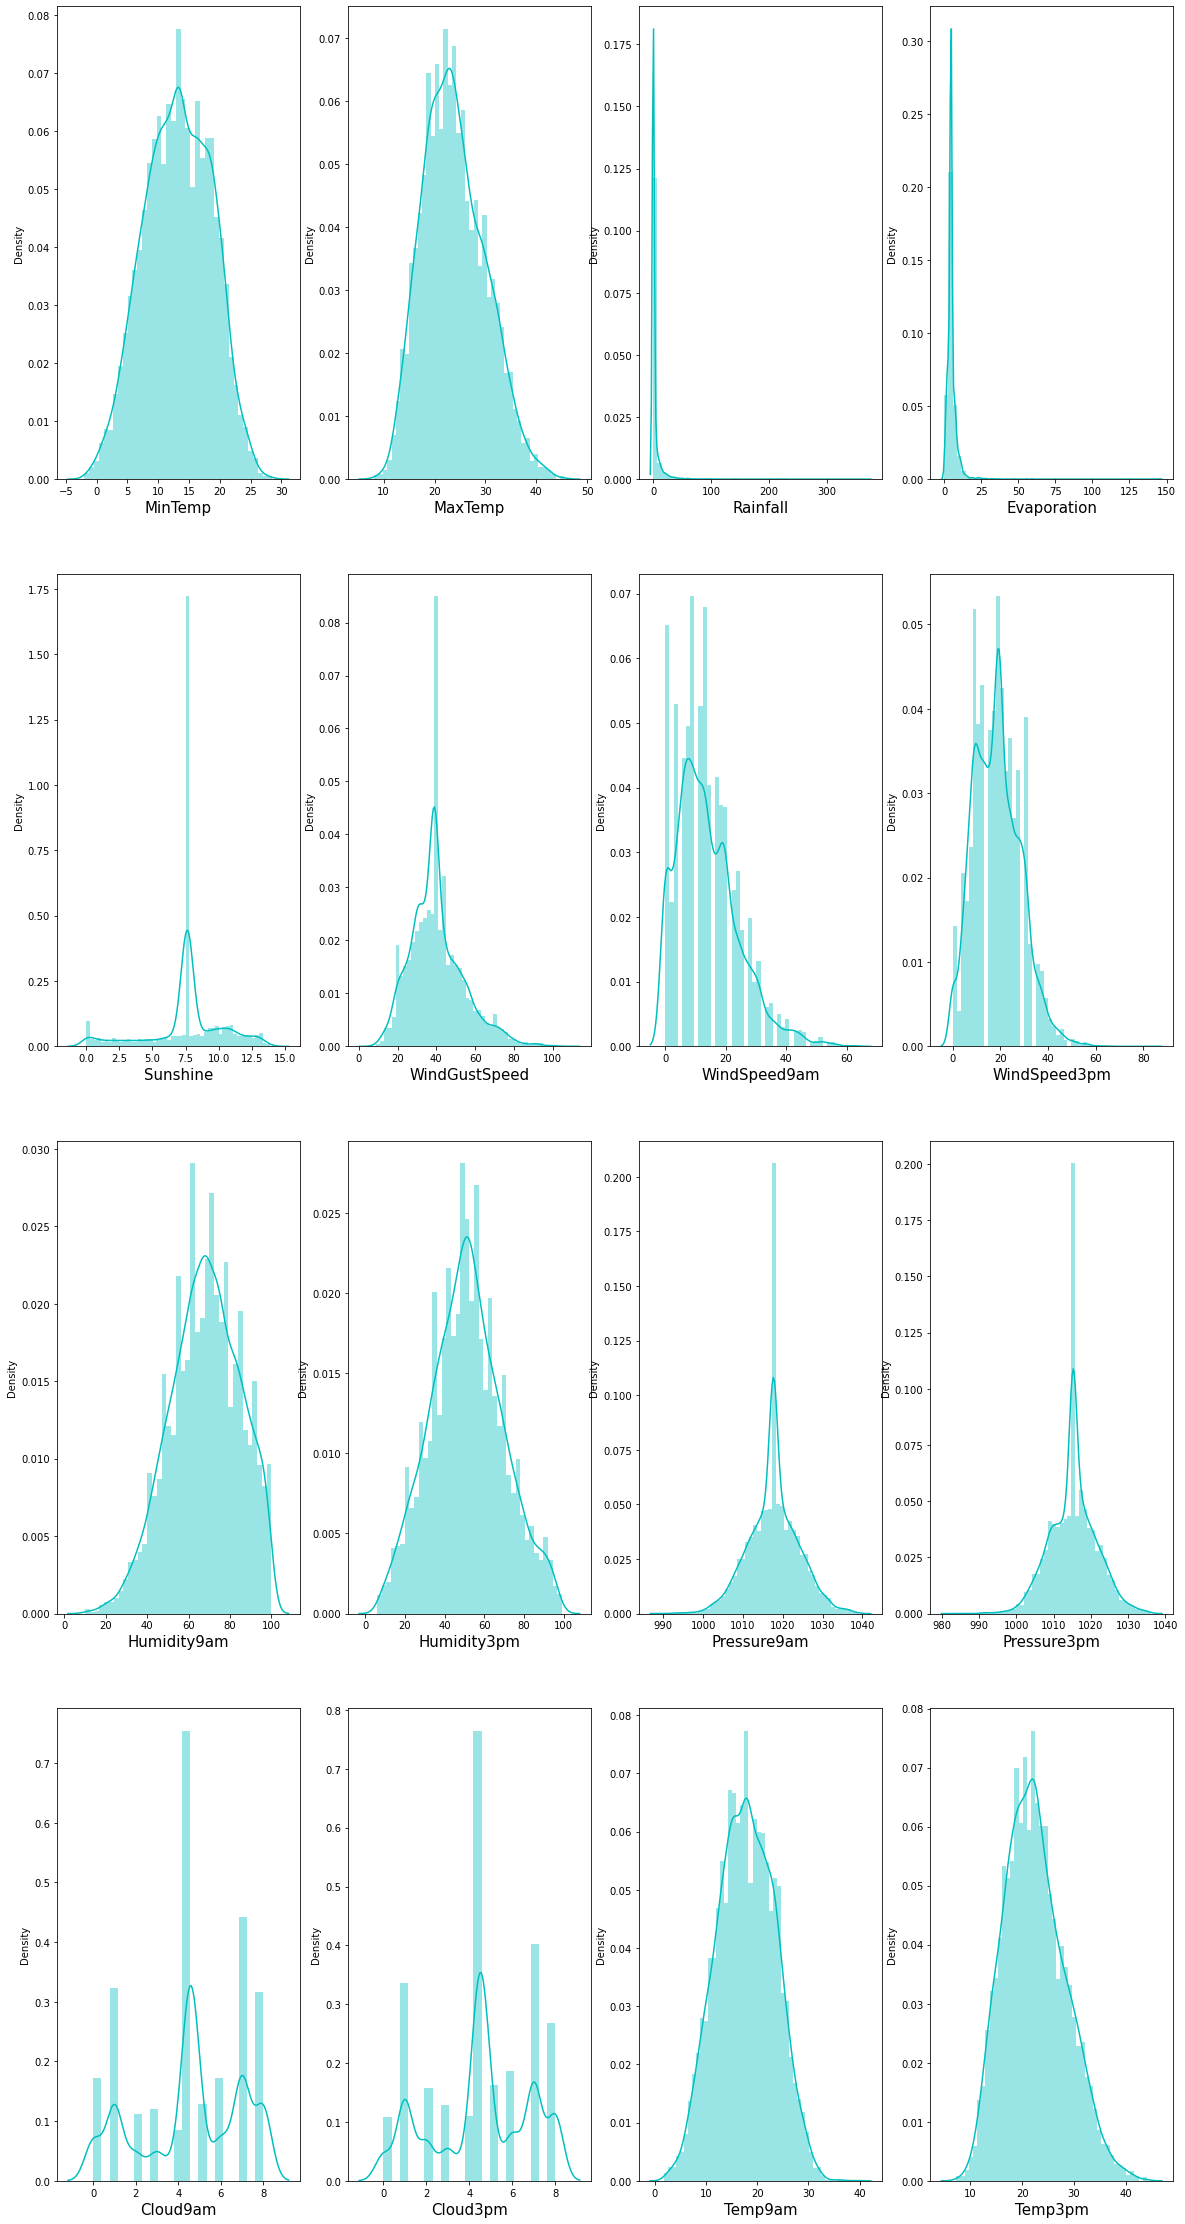

In [124]:
#Checking distribution of numerical columns
plt.figure(figsize = (20,40))
plotnumber = 1
for i in df[num_cols]:
    if plotnumber <= 16:
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot(df[i], color = 'c')
        plt.xlabel(i, fontsize = 15)
    plotnumber += 1
plt.show()

* Most of the columns are normally distributed except Rainfall, Evaporation and WindSpeed9am which are right skewed.

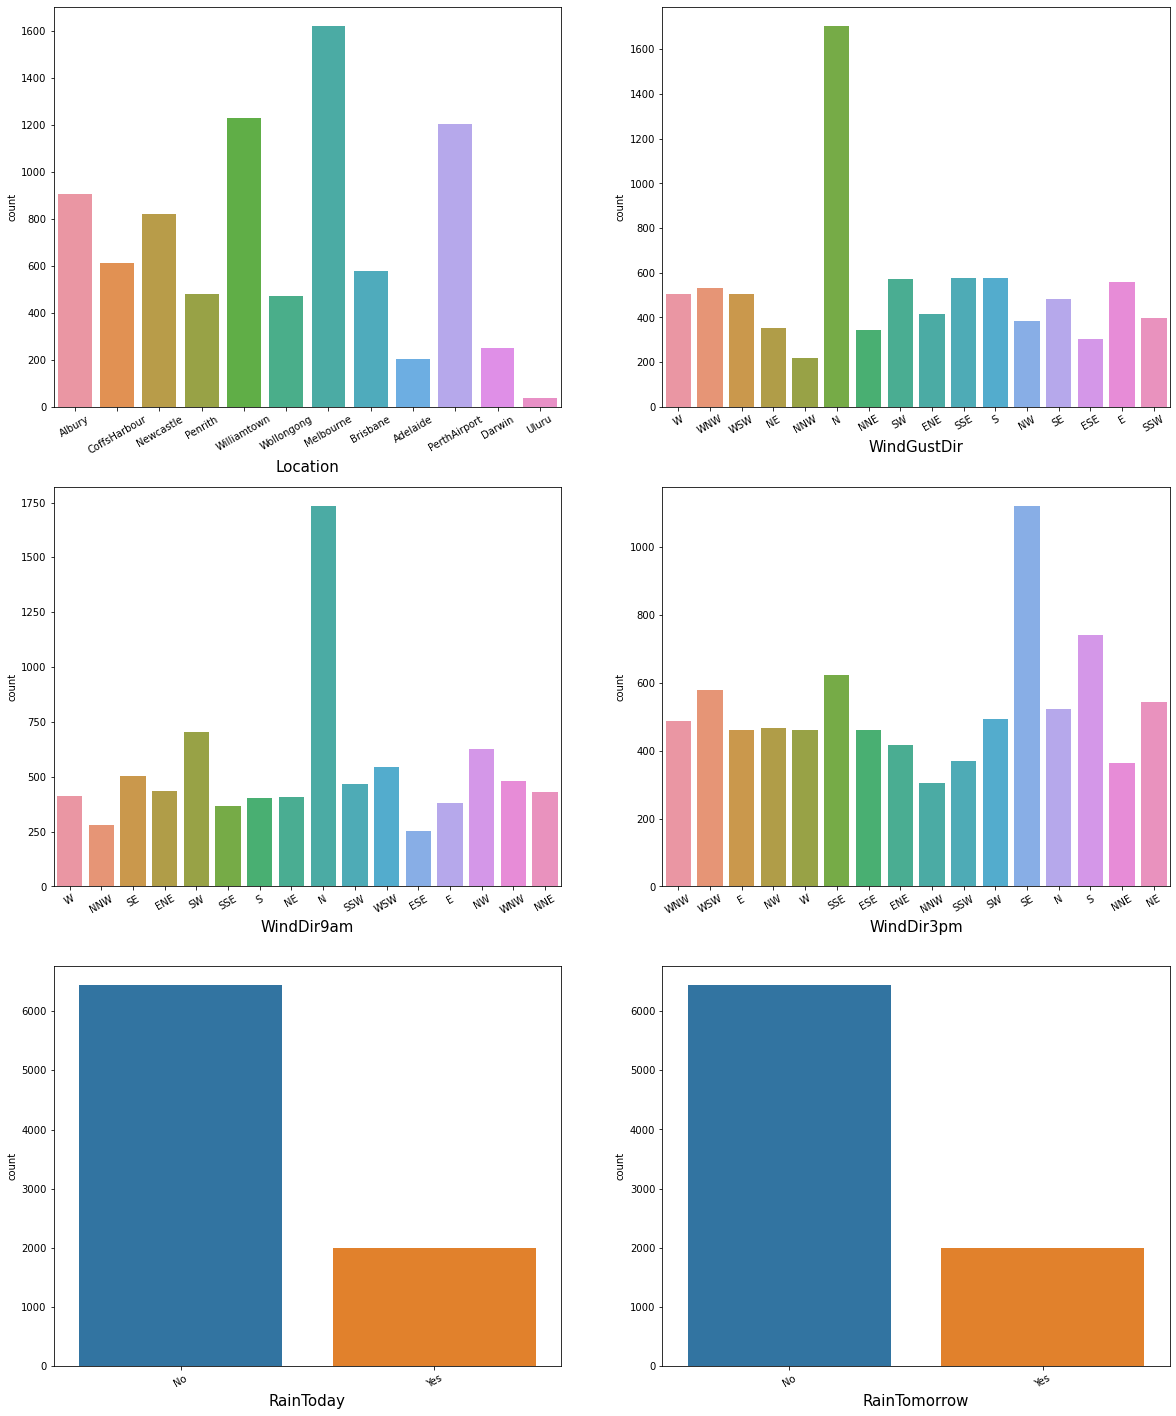

In [125]:
#Checking counts of categroical columns
plt.figure(figsize = (20,25))
plotnumber = 1
for i in df[cat_cols]:
    if plotnumber <= 6:
        ax = plt.subplot(3,2, plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i, fontsize = 15)
        plt.xticks(rotation = 30)
    plotnumber += 1
plt.show()

* Location Melbourne has the most data and Uluru has the least data.
* The strongest wind direction or WindGustSpeed in a day ranges variedly and most of the data says North.
* Morning wind direction (9:00 am) also shows North as the most in the dataset.
* Evening wind direction (3:00 pm) shows South East as the most in the dataset.
* Most of the time there is NO rain today and No rain predicted for tomorrow.

# BiVariate Analysis

In [126]:
#Will plot a stacked plot of categorical columns with target
def stacked_plot(df, group, target):
    fig, ax = plt.subplots(figsize = (10,5))
    temp_df = (df.groupby([group, target]).size() / df.groupby(group)[target].count()).reset_index().pivot(columns = target, index = group, values = 0)
    temp_df.plot(kind = 'bar', stacked = True, ax = ax, color = ["yellow", "green"])
    ax.xaxis.set_tick_params(rotation = 30)
    ax.set_xlabel(group)
    ax.set_ylabel('RanTomorrow')

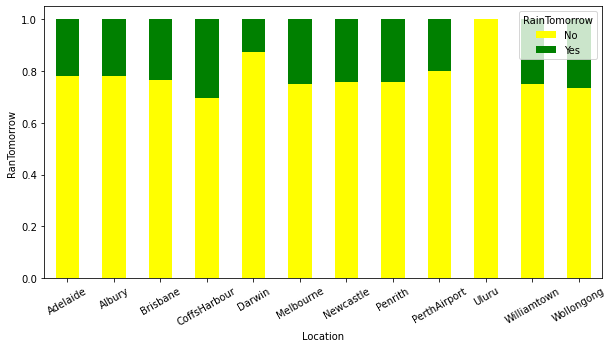

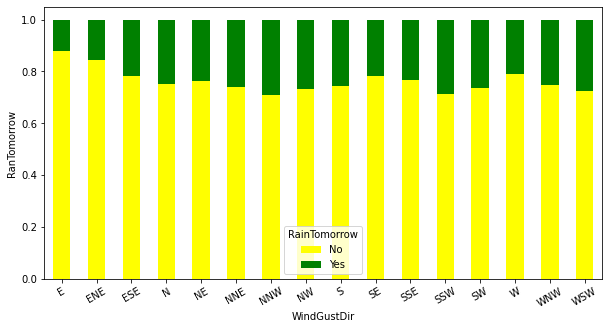

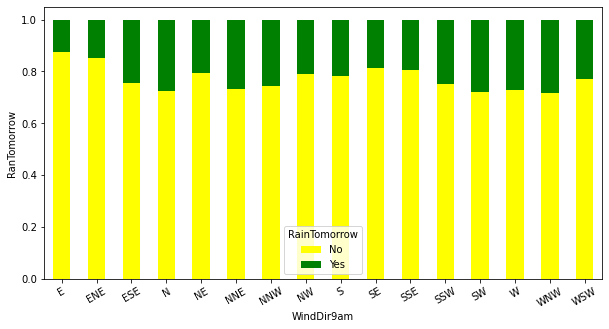

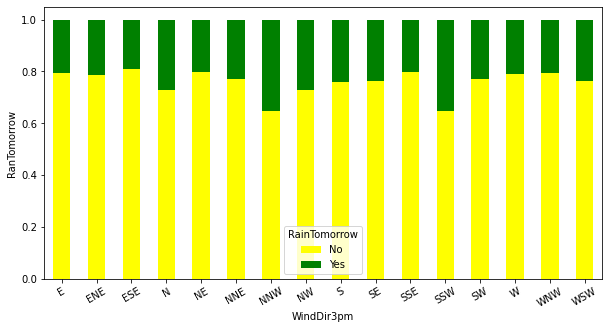

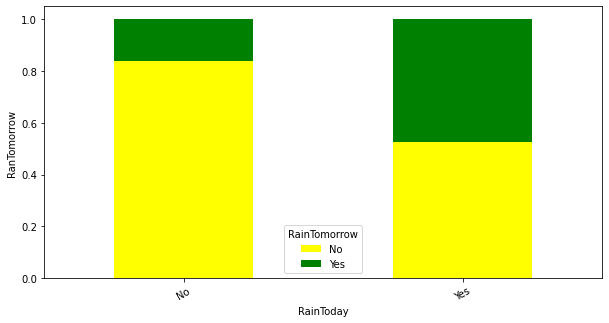

In [127]:
#Let's check for Location, WindGustDir, WindDir9am, WindDir3pm and RainToday
stacked_plot(df, 'Location', 'RainTomorrow')
stacked_plot(df, 'WindGustDir', 'RainTomorrow')
stacked_plot(df, 'WindDir9am', 'RainTomorrow')
stacked_plot(df, 'WindDir3pm', 'RainTomorrow')
stacked_plot(df, 'RainToday', 'RainTomorrow')

* The rainfall predicted for tomorrow is more for CoffsHarbour and zero for Uluru.
* The rainfall rate is the most when the WindGustdirection is NNW and SSW.
* The WindDir9am doesn't have a specific pattern but WindDir3pm suggest that rainfall is predicted to happen when it is NNW and SSW.
* We can see that RainToday and RainTomorrow are highly correlated later will check with correlation map.

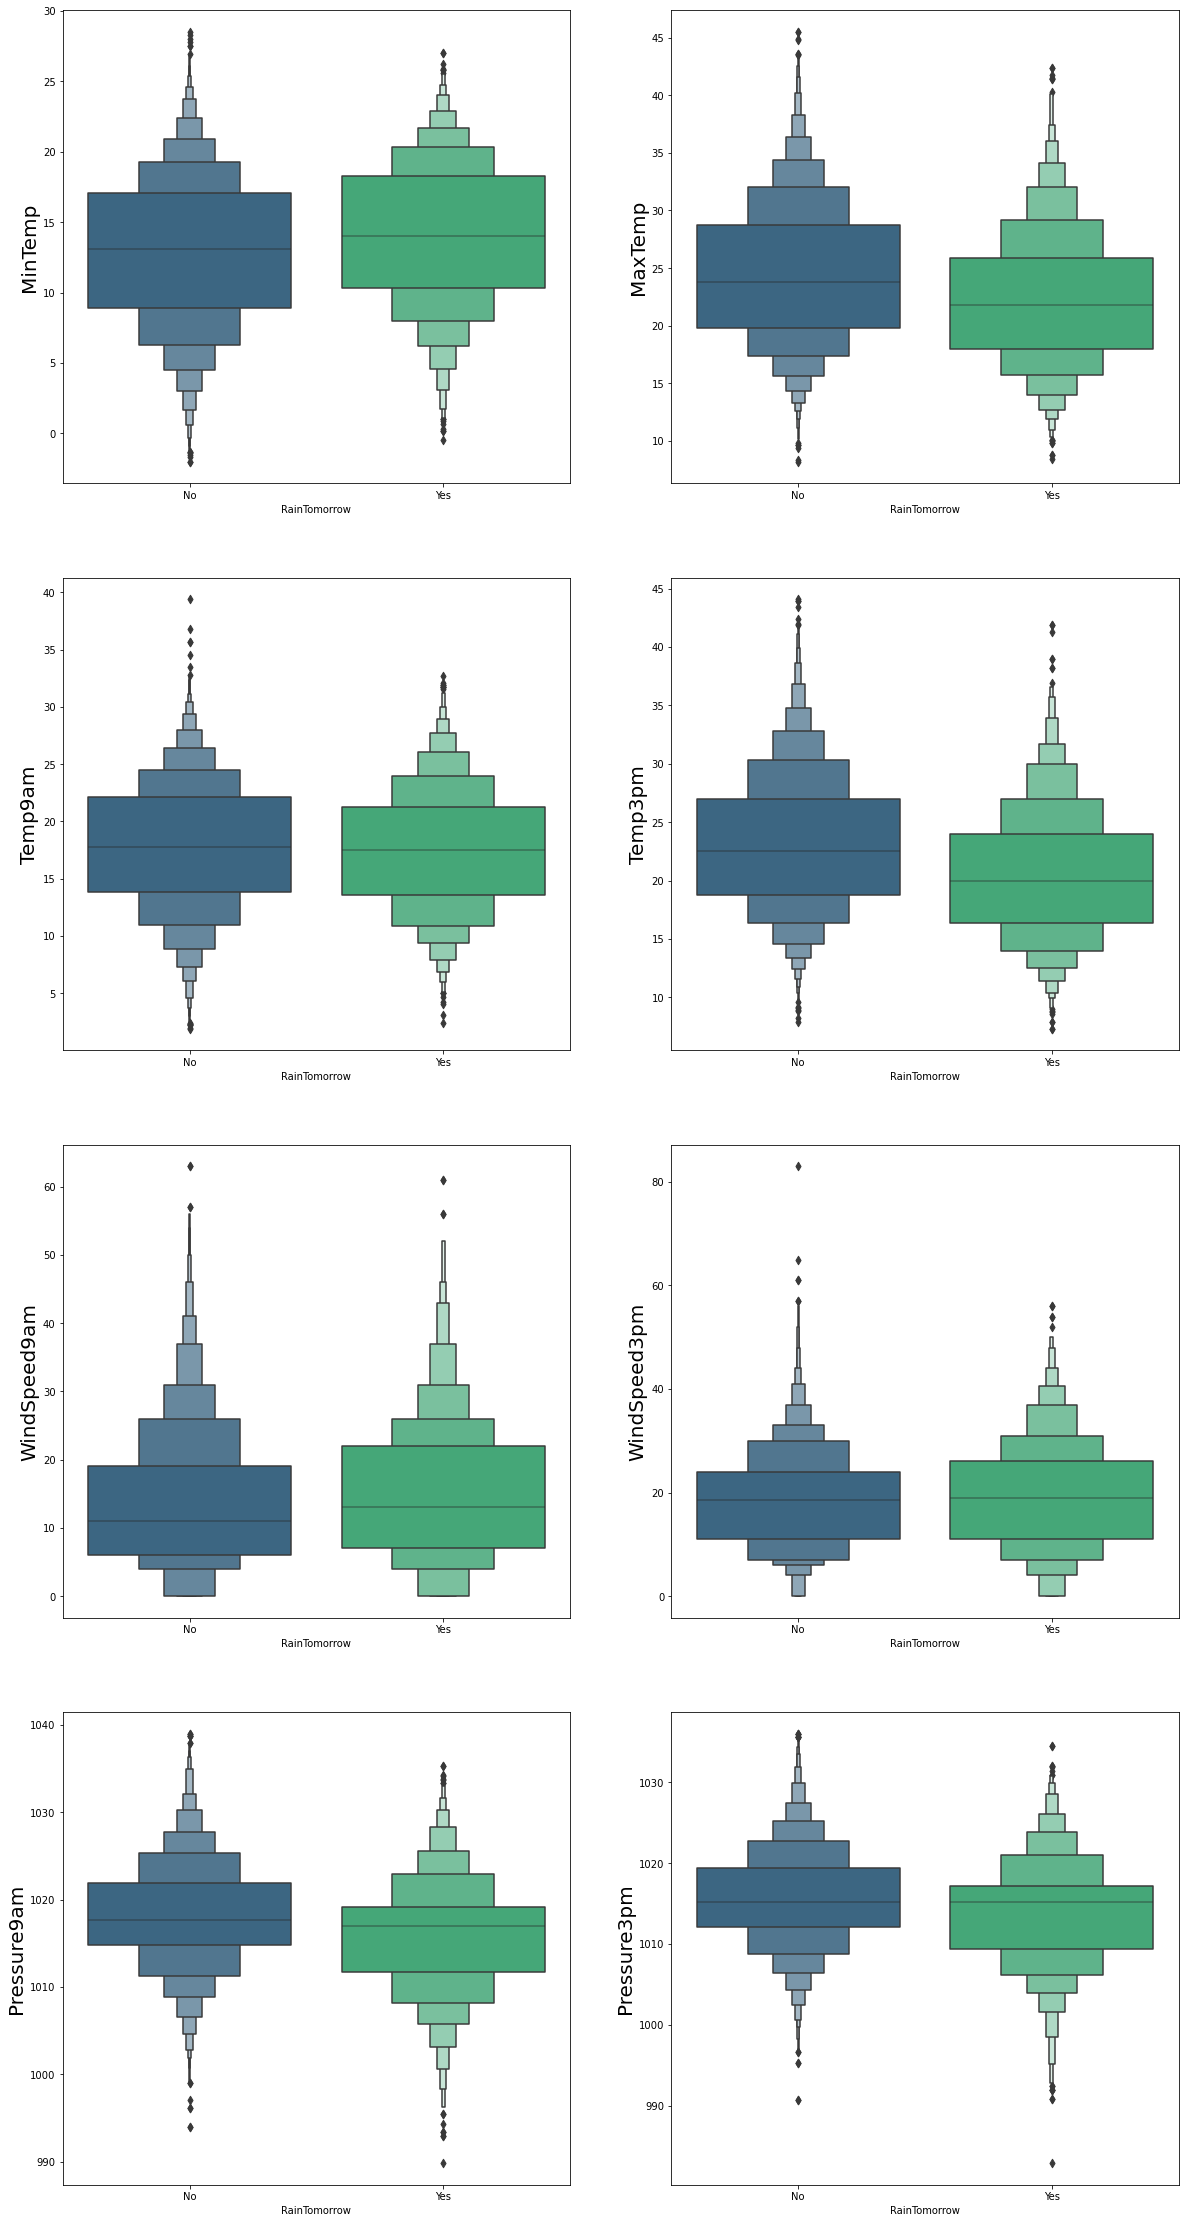

In [128]:
#Checking the relationship between numerical columns and the target variable
num_cols1 = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
num_cols2 = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']

plt.figure(figsize = (20,40))
plotnumber = 1
for i in df[num_cols1]:
    if plotnumber <= 8:
        ax = plt.subplot(4,2, plotnumber)
        sns.boxenplot(x = df.RainTomorrow, y = df[i], palette = 'viridis')
        plt.ylabel(i, fontsize = 20)
        
    plotnumber += 1
plt.show()

* We can see more No then Yes.
* When the MinTemp is between 10 to 17 and MaxTemp between 17 to 27 chances of rainfall on the next day is more.
* Morning Temp doesn't have any specific pattern but evening temperature shows rainfall chance is more when temp is between 17 to 25.
* WindSpeed and Pressure doesn't have any specific pattern.

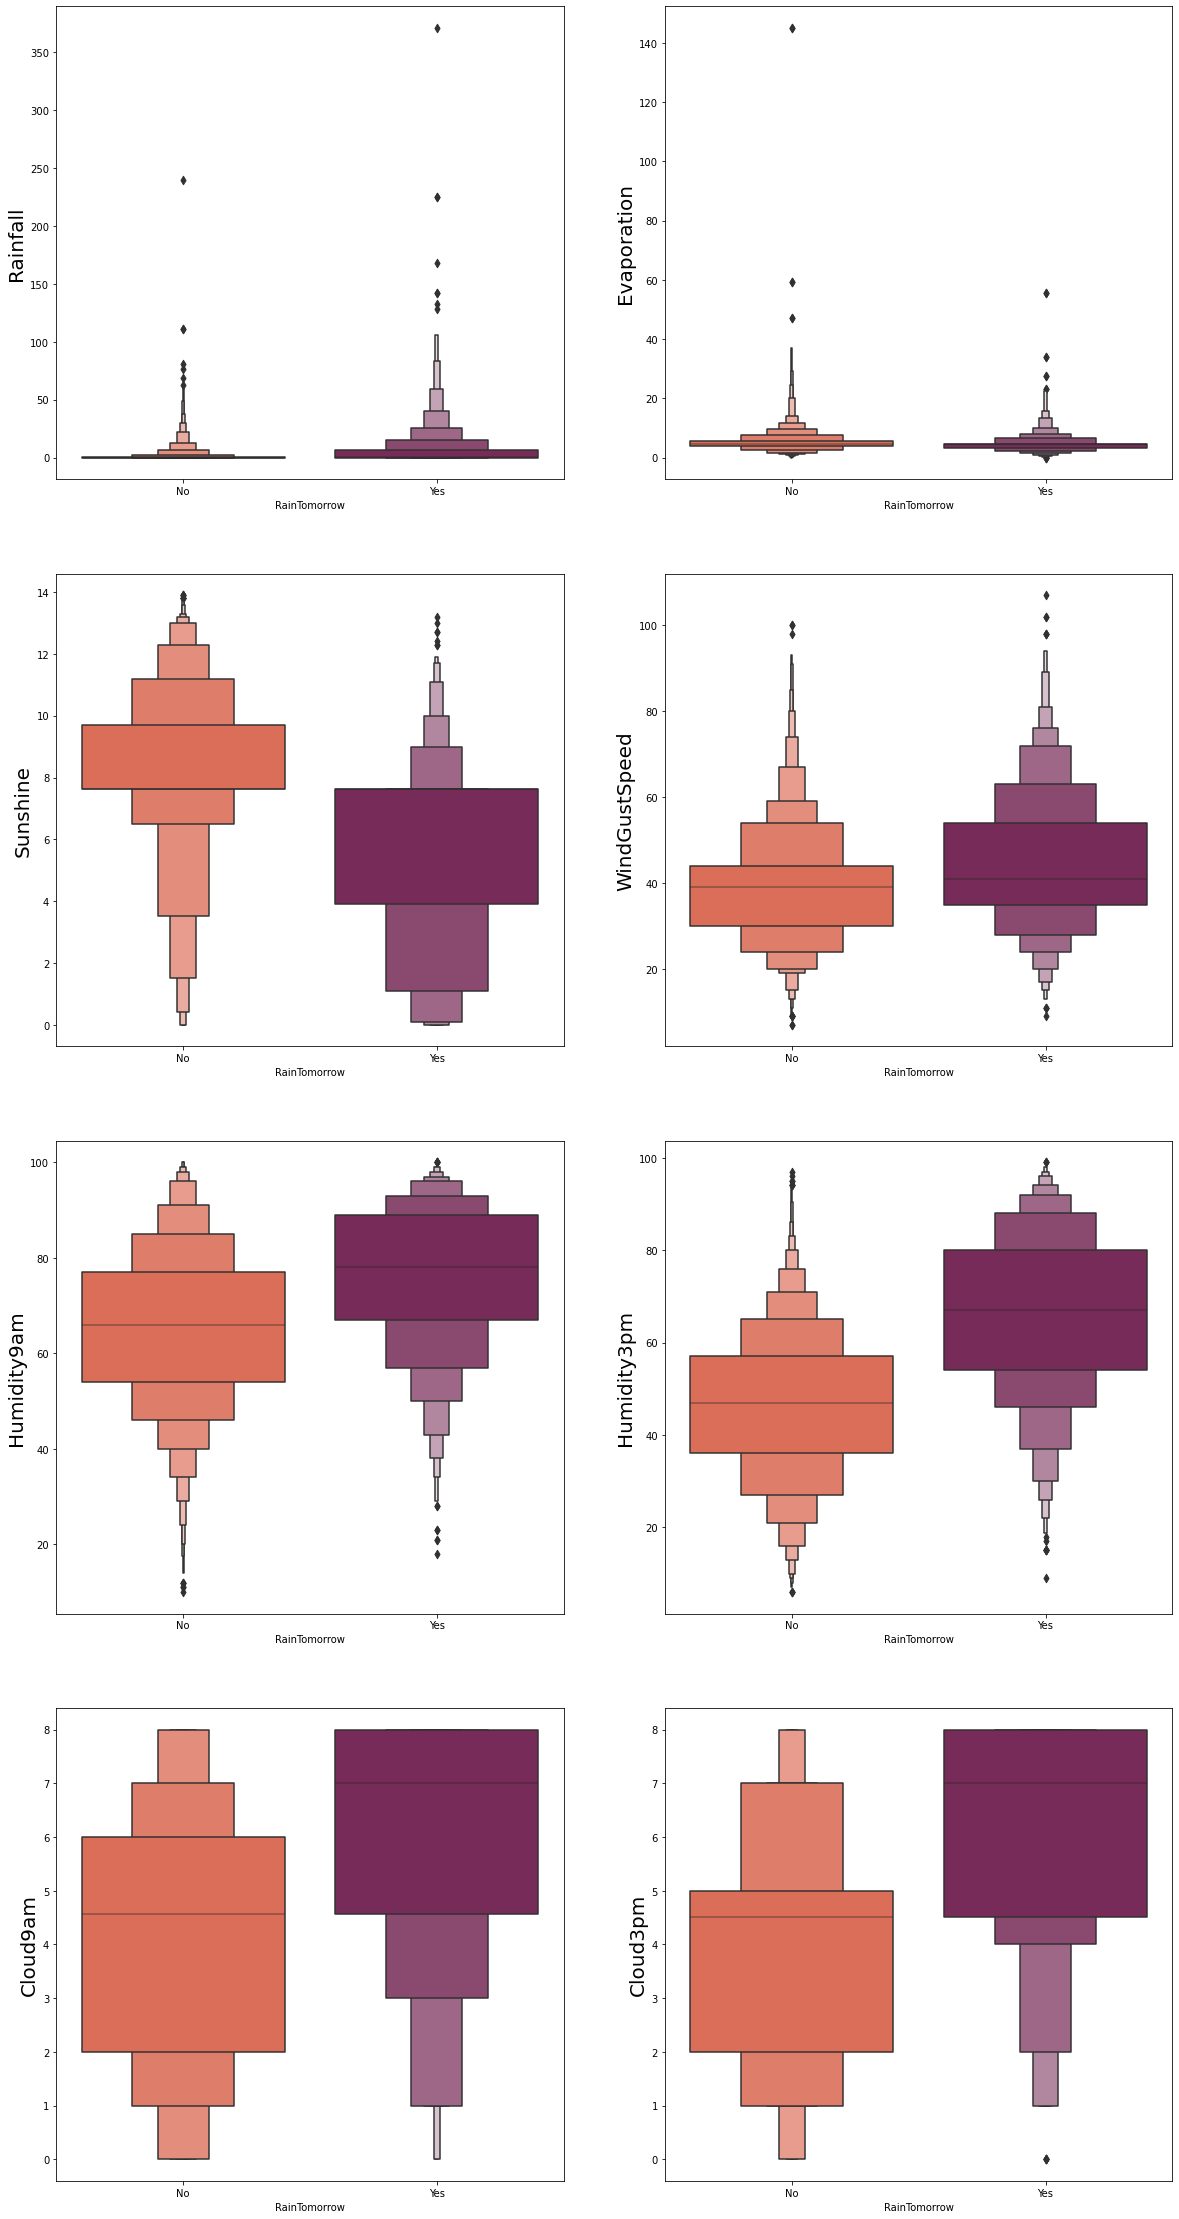

In [129]:
plt.figure(figsize = (20,40))
plotnumber = 1
for i in df[num_cols2]:
    if plotnumber <= 8:
        ax = plt.subplot(4,2, plotnumber)
        sns.boxenplot(x = df.RainTomorrow, y = df[i], palette = 'rocket_r')
        plt.ylabel(i, fontsize = 20)
        
    plotnumber += 1
plt.show()

* Rainfall and RainTomorrow has high correlation.
* Low Sunshine means more chance of RainTomorrow.
* WindGustSpeed and RainTomorrow are positively correlated.
* When humidity is more chance of rainfall is higher.
* When Cloud is more chance of rainfall is higher as well.

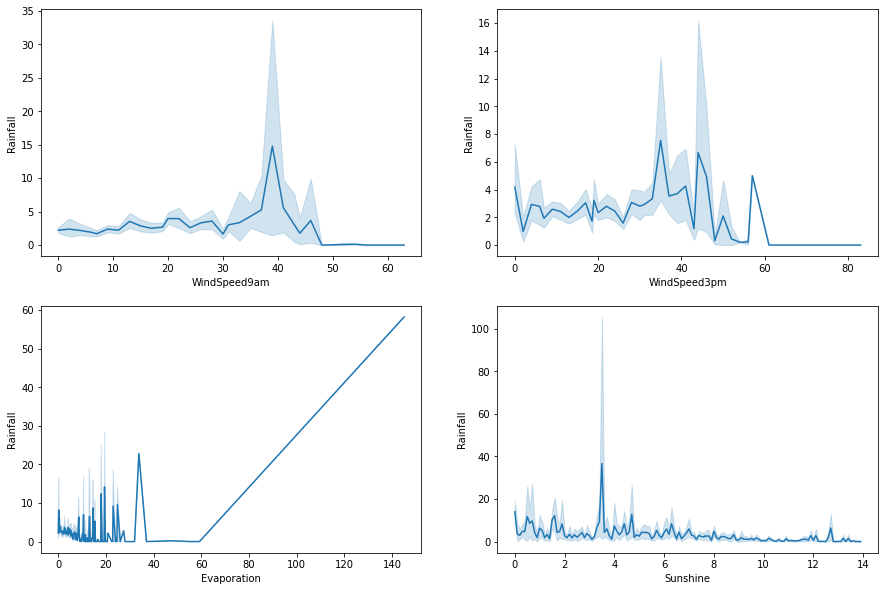

In [130]:
#Checking relationship between features and the second target variable 'Rainfall'
fig, axes = plt.subplots(2,2, figsize = (15,10))

#Checking the relation between WindSpeed9am and Rainfall
sns.lineplot(x = 'WindSpeed9am', y = 'Rainfall', ax = axes[0,0], data = df)

#Checking the relation between WindSpeed3pm and Rainfall
sns.lineplot(x = 'WindSpeed3pm', y = 'Rainfall', ax = axes[0,1], data = df)

#Checking the relation between Evaporation and Rainfall
sns.lineplot(x = 'Evaporation', y = 'Rainfall', ax = axes[1,0], data = df)

#Checking the relation between Sunshine and Rainfall
sns.lineplot(x = 'Sunshine', y = 'Rainfall', ax = axes[1,1], data = df)
plt.show()

* In the morning at WindSpeed between 30 to 40 km/h the rainfall is more.
* In the evening at windSpeed and rainfall pattern varies.
* We can see that Evaporation and rainfall are correlated.
* Lesser Sunshine leads to more rainfall.

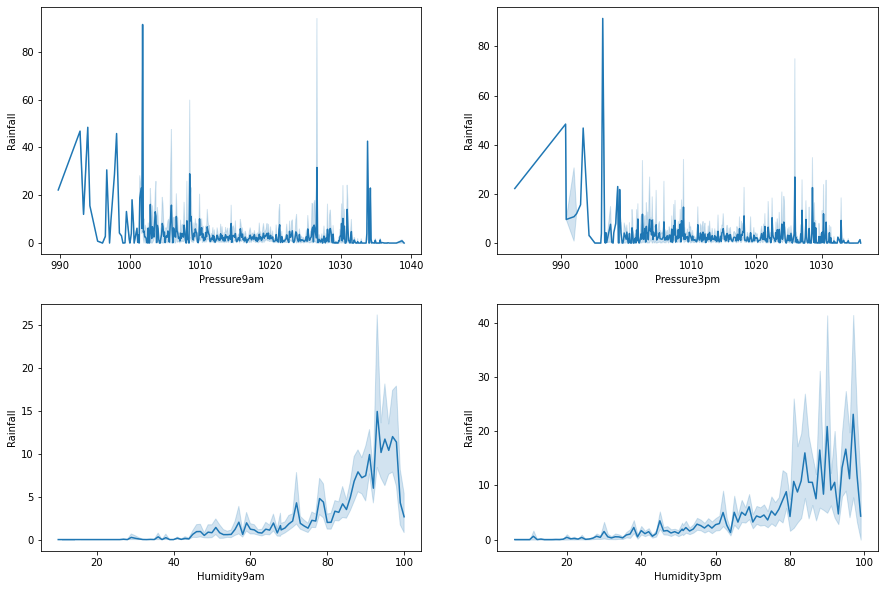

In [131]:
#Checking relationship between features and the second target variable 'Rainfall'
fig, axes = plt.subplots(2,2, figsize = (15,10))

#Checking the relation between Pressure9am and Rainfall
sns.lineplot(x = 'Pressure9am', y = 'Rainfall', ax = axes[0,0], data = df)

#Checking the relation between Pressure3pm and Rainfall
sns.lineplot(x = 'Pressure3pm', y = 'Rainfall', ax = axes[0,1], data = df)

#Checking the relation between Humidity9am and Rainfall
sns.lineplot(x = 'Humidity9am', y = 'Rainfall', ax = axes[1,0], data = df)

#Checking the relation between Humidity3pm and Rainfall
sns.lineplot(x = 'Humidity3pm', y = 'Rainfall', ax = axes[1,1], data = df)
plt.show()

# Outliers

In [132]:
num_cols = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        num_cols.append(i)
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

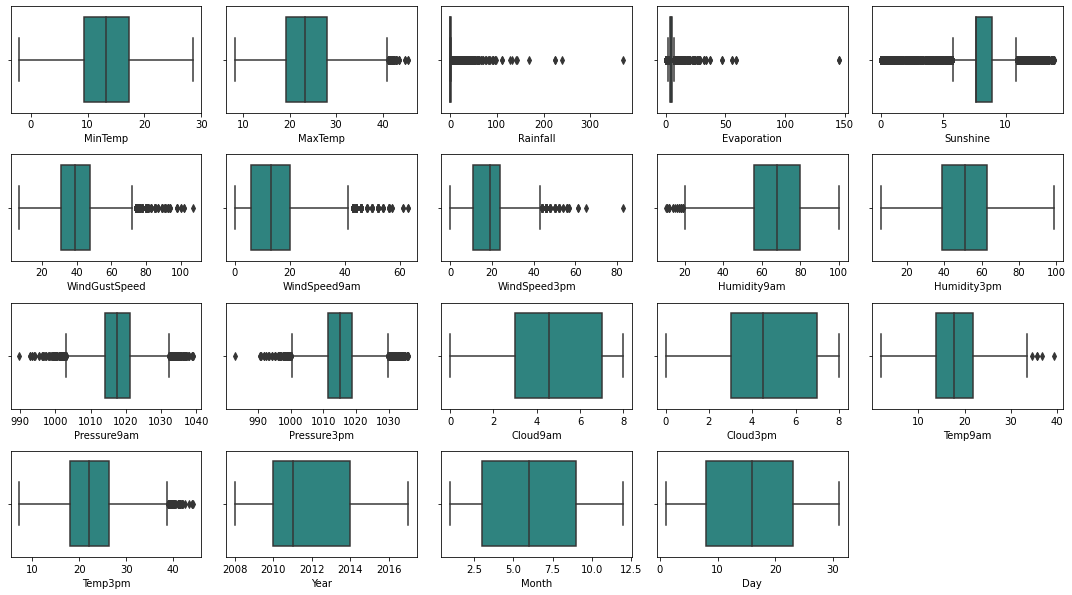

In [133]:
plt.figure(figsize = (15,10))
plotnumber = 1

for i in num_cols:
    plt.subplot(5,5, plotnumber)
    sns.boxplot(df[i], palette = 'viridis')
    plt.xlabel(i, fontsize = 10)
    plotnumber += 1    
    plt.tight_layout()

In [134]:
outcols = df[['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
             'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']]
z = np.abs(zscore(outcols))
df_new = df[(z < 3).all(axis = 1)]
df_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.900000,0.6,4.6,7.632205,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.100000,0.0,4.6,7.632205,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.700000,0.0,4.6,7.632205,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.000000,0.0,4.6,7.632205,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.300000,1.0,4.6,7.632205,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,4.6,7.632205,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No,2017,6,21
8421,Uluru,3.6,25.300000,0.0,4.6,7.632205,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No,2017,6,22
8422,Uluru,5.4,26.900000,0.0,4.6,7.632205,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No,2017,6,23
8423,Uluru,7.8,27.000000,0.0,4.6,7.632205,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No,2017,6,24


In [135]:
#Checking skewness after using z score
df_new.skew().sort_values()

Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.539852
WindSpeed9am     0.713786
Evaporation      1.280696
Rainfall         3.519090
dtype: float64

* Still seeing outliers in Rainfall, Evaporation, Sunshine, WindGustSpeed and WindSpeed9am

In [136]:
#Printing old and new datset shape
print('Old Data Shape', df.shape)
print('New Data Shape', df_new.shape)

Old Data Shape (8425, 25)
New Data Shape (7987, 25)


In [137]:
#Printing data loss after removing skewness
data_loss = (8425 - 7987)/8425 * 100
print('Data loss percentage after removing outliers: ', data_loss)

Data loss percentage after removing outliers:  5.198813056379822


In [138]:
#Using power transformer to handle skewness
skewed_cols = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am']

transform = PowerTransformer(method = 'yeo-johnson')
df_new[skewed_cols] = transform.fit_transform(df_new[skewed_cols].values)

In [139]:
df_new.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         1.040980
Evaporation      0.061105
Sunshine        -0.066262
WindGustSpeed    0.004523
WindSpeed9am    -0.110908
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
Year             0.430100
Month            0.054460
Day              0.002731
dtype: float64

* We still have skewness in Rainfall.

In [140]:
df_new['Rainfall'] = np.log1p(df_new['Rainfall'])

In [141]:
df_new.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         0.845049
Evaporation      0.061105
Sunshine        -0.066262
WindGustSpeed    0.004523
WindSpeed9am    -0.110908
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
Year             0.430100
Month            0.054460
Day              0.002731
dtype: float64

* Skewness have been removed from the dataset.

# Encoding

In [142]:
#Will transform categorical columns to numerical using Ordinal encoder
enc = OrdinalEncoder()

for i in cat_cols:
    df_new[i] = enc.fit_transform(df_new[i].values.reshape(-1,1))

In [143]:
df_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1.0,13.4,22.900000,0.572706,0.033069,-0.097439,13.0,0.448790,13.0,14.0,0.785250,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,2008,12,1
1,1.0,7.4,25.100000,-1.061985,0.033069,-0.097439,14.0,0.448790,6.0,15.0,-0.982717,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2008,12,2
2,1.0,12.9,25.700000,-1.061985,0.033069,-0.097439,15.0,0.593637,13.0,15.0,0.701237,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,1.0,9.2,28.000000,-1.061985,0.033069,-0.097439,4.0,-1.250093,9.0,0.0,-0.062332,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,2008,12,4
4,1.0,17.5,32.300000,0.758751,0.033069,-0.097439,13.0,0.224831,1.0,7.0,-0.540338,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.400000,-1.061985,0.033069,-0.097439,0.0,-0.591948,9.0,1.0,0.147286,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0,2017,6,21
8421,9.0,3.6,25.300000,-1.061985,0.033069,-0.097439,6.0,-1.456067,9.0,3.0,0.147286,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0,2017,6,22
8422,9.0,5.4,26.900000,-1.061985,0.033069,-0.097439,3.0,-0.087700,9.0,14.0,-0.289675,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0,2017,6,23
8423,9.0,7.8,27.000000,-1.061985,0.033069,-0.097439,9.0,-0.863369,10.0,3.0,0.147286,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,2017,6,24


In [144]:
df_new.dtypes

Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
Year               int64
Month              int64
Day                int64
dtype: object

* All features are in numerical value now.

# Correlation

In [145]:
#Checking feature correlation
df_new.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
Location,1.000000,0.116694,0.063798,0.009639,0.110101,0.039174,-0.037707,0.256093,-0.041030,-0.031195,0.242006,0.231939,0.003725,0.059978,-0.024265,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222,0.481143,-0.086011,-0.004978
MinTemp,0.116694,1.000000,0.718598,0.052980,0.392350,0.087866,-0.154935,0.249668,-0.045231,-0.154184,0.163324,0.185976,-0.126383,0.090208,-0.433113,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.040001,-0.247066,0.010924
MaxTemp,0.063798,0.718598,1.000000,-0.256299,0.488844,0.403083,-0.237955,0.151581,-0.217160,-0.190417,0.021424,0.093241,-0.382687,-0.409560,-0.333569,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.120204,-0.164351,0.017068
Rainfall,0.009639,0.052980,-0.256299,1.000000,-0.207855,-0.266296,0.134170,0.062402,0.155621,0.123405,0.011237,0.011732,0.412016,0.389712,-0.098198,-0.021809,0.302834,0.271987,-0.120315,-0.266349,0.878298,0.307088,0.009945,-0.005659,-0.018813
Evaporation,0.110101,0.392350,0.488844,-0.207855,1.000000,0.411843,-0.112642,0.196884,-0.094571,-0.039378,0.128495,0.121518,-0.352006,-0.241401,-0.266139,-0.281996,-0.134010,-0.163262,0.467829,0.473297,-0.172497,-0.093593,0.103405,-0.039374,0.013640
Sunshine,0.039174,0.087866,0.403083,-0.266296,0.411843,1.000000,-0.112272,0.032268,-0.082335,-0.073518,0.027076,0.062445,-0.392096,-0.439592,-0.012336,-0.074037,-0.543857,-0.555038,0.285620,0.418462,-0.223070,-0.315207,0.024638,0.001092,0.004631
WindGustDir,-0.037707,-0.154935,-0.237955,0.134170,-0.112642,-0.112272,1.000000,0.010467,0.405681,0.507292,0.080857,0.108357,0.031081,0.051061,-0.095047,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378,-0.096042,0.038044,0.017003
WindGustSpeed,0.256093,0.249668,0.151581,0.062402,0.196884,0.032268,0.010467,1.000000,-0.061313,0.082607,0.547983,0.638803,-0.278466,-0.089346,-0.373415,-0.331119,0.009512,0.059854,0.220355,0.117052,0.076552,0.172511,-0.032144,0.046758,-0.005065
WindDir9am,-0.041030,-0.045231,-0.217160,0.155621,-0.094571,-0.082335,0.405681,-0.061313,1.000000,0.243622,0.141133,0.058887,0.009571,0.117910,-0.003943,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091,-0.034468,0.018344,-0.010014
WindDir3pm,-0.031195,-0.154184,-0.190417,0.123405,-0.039378,-0.073518,0.507292,0.082607,0.243622,1.000000,0.041537,0.079716,-0.007820,-0.009385,-0.129842,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674,-0.010781,0.028629,-0.000714


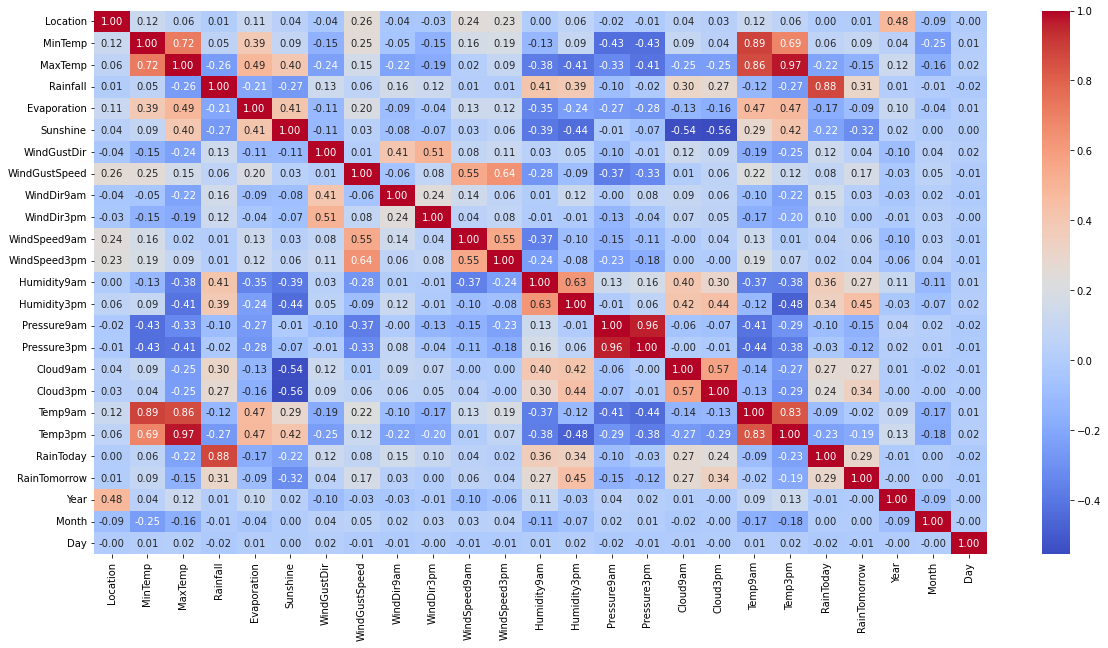

In [146]:
#Using heatmap to check correlation between features
corr = df_new.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

* Multicollinearity problem is present in the dataset.
* Our target Rainfall is highly correlated with RainToday, followed by Humidity9am and Humidity3pm.
* Least correlation is between rainfall and year, month, WindSpeed9am, Windspeed3pm, location.
* Target RainTomorrow is highly correlated with Humidity3pm followed by Cloud3pm.
* RainTomorrow is least correlated with Year, month and Wind Direction3pm.

# Prediction for RainTomorrow

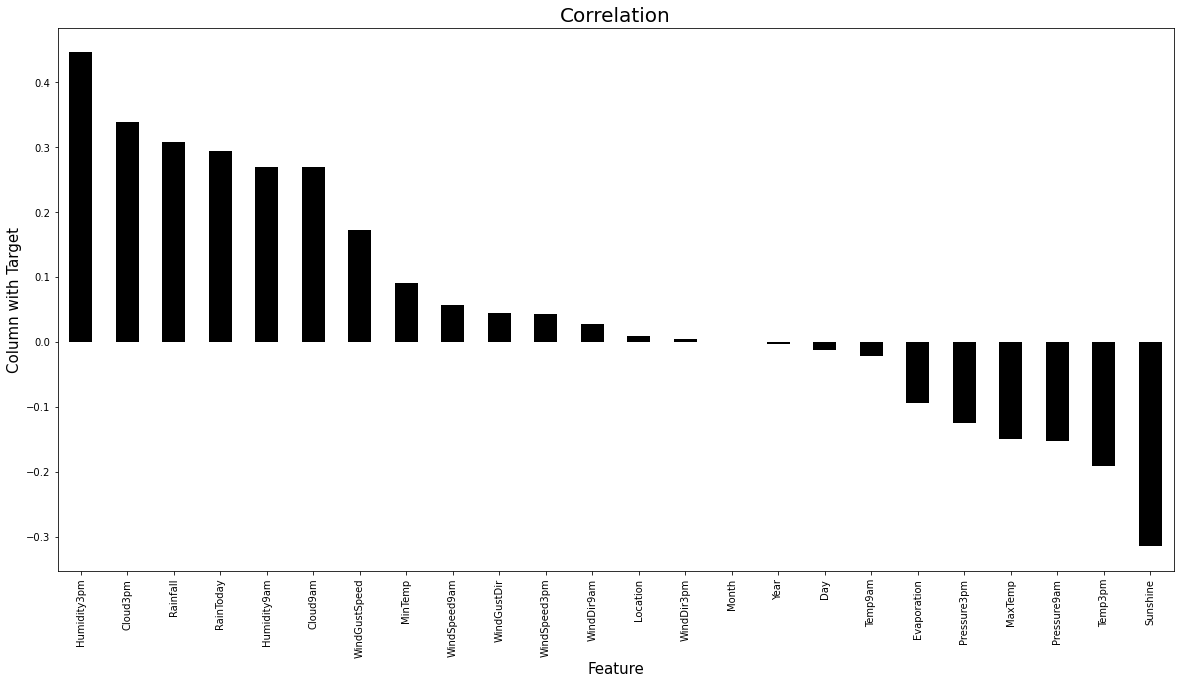

In [147]:
#Visualizing correlation
plt.figure(figsize = (20,10))
df_new.corr()['RainTomorrow'].sort_values(ascending = False).drop(['RainTomorrow']).plot(kind = 'bar', color = 'black')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Column with Target', fontsize = 15)
plt.title('Correlation', fontsize = 20)
plt.show()

# Spliting Dataset into X and Y Variable

In [148]:
x = df_new.drop('RainTomorrow', axis = 1)
y = df_new['RainTomorrow']

In [149]:
x.shape

(7987, 24)

In [150]:
y.shape

(7987,)

# Standardization

In [151]:
#Scaling x dataset using Standard Scaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)

# Multicollinearity

In [152]:
# Checking multicollinearity problem using VIF
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif['features'] = x.columns

#Let's check the values
vif

,VIF values,features
0,1.588024,Location
1,8.845417,MinTemp
2,26.405469,MaxTemp
3,4.784362,Rainfall
4,1.619416,Evaporation
5,2.069709,Sunshine
6,1.613646,WindGustDir
7,2.300975,WindGustSpeed
8,1.363279,WindDir9am
9,1.490041,WindDir3pm


* We can see multicollinearity issue for MaxTemp, Pressure9am, Pressure3pm, Temp9am and Temp3pm.

In [153]:
#Droping Temp3pm
x.drop('Temp3pm', axis = 1, inplace = True)

In [154]:
# Checking VIF after removing Temp3pm
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif['features'] = x.columns

#Let's check the values
vif

,VIF values,features
0,1.587215,Location
1,8.804100,MinTemp
2,9.655865,MaxTemp
3,4.784279,Rainfall
4,1.619144,Evaporation
5,2.069707,Sunshine
6,1.610366,WindGustDir
7,2.291523,WindGustSpeed
8,1.362318,WindDir9am
9,1.489088,WindDir3pm


In [155]:
#Removing Pressure9am
x.drop('Pressure9am', axis = 1, inplace = True)

In [156]:
# Checking VIF after removing Pressure9am
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif['features'] = x.columns

#Let's check the values
vif

,VIF values,features
0,1.587147,Location
1,8.682600,MinTemp
2,9.271322,MaxTemp
3,4.777557,Rainfall
4,1.602345,Evaporation
5,2.061571,Sunshine
6,1.596771,WindGustDir
7,2.271250,WindGustSpeed
8,1.340543,WindDir9am
9,1.420618,WindDir3pm


In [157]:
#Removing Temp9am
x.drop('Temp9am', axis = 1, inplace = True)

In [158]:
# Checking VIF after removing Temp9am
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif['features'] = x.columns

#Let's check the values
vif

,VIF values,features
0,1.584828,Location
1,4.554851,MinTemp
2,5.514706,MaxTemp
3,4.776347,Rainfall
4,1.598459,Evaporation
5,2.052843,Sunshine
6,1.594644,WindGustDir
7,2.232015,WindGustSpeed
8,1.340393,WindDir9am
9,1.420168,WindDir3pm


* Multicollinearity issue have been resolved.

# SMOTE

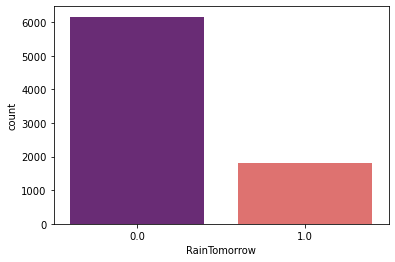

In [159]:
#Printing count of RainTomorrow
sns.countplot(y, palette = 'magma')
plt.show()

In [160]:
#Balancing dataset using SMOTE()
smt = SMOTE()
x,y = smt.fit_resample(x,y)

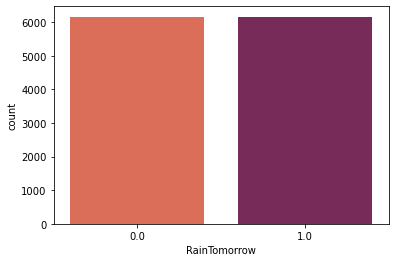

In [161]:
#Printing count of RainTomorrow after using SMOTE method
sns.countplot(y, palette = 'rocket_r')
plt.show()

# PCA - Principle Component Analysis

In [162]:
pca = PCA()
principle_comp = pca.fit_transform(x)

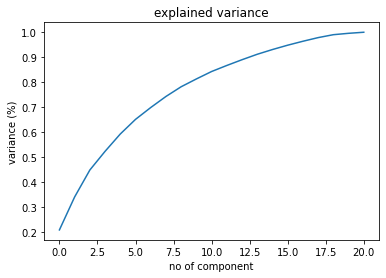

In [163]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

* Graph shows 17 components has explained 98% - 99% variance of all features, so will use 17.

In [164]:
pca = PCA(n_components = 17)
x = pca.fit_transform(x)
x

array([[-0.01182854, -1.26364225, -2.26709853, ...,  1.20384041,
        -0.6116874 , -0.34313725],
       [ 1.71132076,  0.12248354, -2.58629614, ..., -0.17261338,
        -0.4700551 ,  0.43488188],
       [ 2.00301859, -1.19883328, -3.25601759, ...,  0.69501026,
         0.03239504, -0.0364368 ],
       ...,
       [-0.67683687, -0.01713708, -2.84804492, ..., -1.25408391,
         0.03522367, -0.11975671],
       [ 1.59668176, -1.71411057,  2.09973427, ...,  0.25383531,
         1.21109463,  0.67576424],
       [-3.00510232,  1.09064687,  1.25110588, ...,  0.09139663,
         0.61052015, -1.01244612]])

# Building Classification Model

In [165]:
#Find best Random_state
maxaccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x, y, random_state = i,test_size = 0.2)
    LR =  LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7887266828872669 on Random State = 51


In [166]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 95)

In [167]:
LR_model = LogisticRegression()
RD_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
SV_model = SVC()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
XGB_model = XGBClassifier()
SGH_model = SGDClassifier()
Bag_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
GB_model = GradientBoostingClassifier()

model = [LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model]

In [168]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred = m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred) * 100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 77.2911597729116
Confusion Matrix of  LogisticRegression()  is 
 [[982 272]
 [288 924]]
              precision    recall  f1-score   support

         0.0       0.77      0.78      0.78      1254
         1.0       0.77      0.76      0.77      1212

    accuracy                           0.77      2466
   macro avg       0.77      0.77      0.77      2466
weighted avg       0.77      0.77      0.77      2466

**************************************************
Accuracy_Score of  RidgeClassifier() is 77.25060827250608
Confusion Matrix of  RidgeClassifier()  is 
 [[987 267]
 [294 918]]
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      1254
         1.0       0.77      0.76      0.77      1212

    accuracy                           0.77      2466
   macro avg       0.77      0.77      0.77      2466
weighted avg       0.77      0.77      0.77      2466

**************************************

In [169]:
#Checking Cross Validation
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i, x, y, cv = 5, scoring = 'accuracy').mean() * 100)
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 77.2911597729116
cross Validation accuracy score of  LogisticRegression()  is  71.07055961070559
**************************************************
Accuracy_Score of  RidgeClassifier() is 77.25060827250608
cross Validation accuracy score of  RidgeClassifier()  is  71.25709651257097
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 87.14517437145174
cross Validation accuracy score of  DecisionTreeClassifier()  is  78.79967558799676
**************************************************
Accuracy_Score of  SVC() is 84.75263584752636
cross Validation accuracy score of  SVC()  is  72.06812652068126
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 86.57745336577453
cross Validation accuracy score of  KNeighborsClassifier()  is  72.25466342254664
**************************************************
Accuracy_Score of  RandomForestClassifier() is 93.30900243309003


* Random Forest Classifier has given the best accuracy score which is 93% in all models.

# Next will check ROC AUC curve for the fitted model

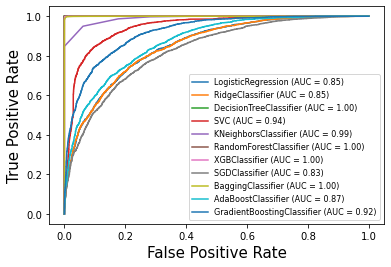

In [170]:
#Let's see how well our model works on training data.
disp = plot_roc_curve(LR_model,x_train,y_train)

plot_roc_curve(RD_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(DT_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(SV_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(KNR_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(RFR_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(XGB_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(SGH_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(Bag_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(ADA_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(GB_model, x_train, y_train, ax = disp.ax_)

plt.legend(prop = {'size': 8}, loc = 'lower right')

plt.xlabel("False Positive Rate", fontsize = 15)

plt.ylabel("True Positive Rate", fontsize = 15)

plt.show()

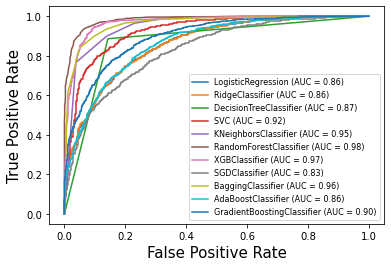

In [171]:
#Let's see how well our model works on test data.
disp = plot_roc_curve(LR_model, x_test, y_test)

plot_roc_curve(RD_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(DT_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(SV_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(KNR_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(RFR_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(XGB_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(SGH_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(Bag_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(ADA_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(GB_model, x_test, y_test, ax = disp.ax_)

plt.legend(prop = {'size': 8}, loc = 'lower right')

plt.xlabel("False Positive Rate", fontsize = 15)

plt.ylabel("True Positive Rate", fontsize = 15)

plt.show()

# Hyper Tuning Random Forest Classifier

In [172]:
#Let's tune the parameters using GridSearchCV
params = {
    'n_estimators':[13,15,17],
    'criterion':['gini','entropy'],
    'max_depth':[10,15],
    'min_samples_leaf':[5,6],
    'min_samples_split':[10,11],
}
grd = GridSearchCV(RFR_model, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 17}


In [173]:
Tuned_RFR_model = grd.best_estimator_
Tuned_RFR_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=17)

In [174]:
#Model Confidence/Accuracy
print('Accuracy_Score of Tuned Random Forest Model is', accuracy_score(y_test,Tuned_RFR_model.predict(x_test))*100)
print("Cross Validation accuracy score of Tuned Random Forest model is ",cross_val_score(Tuned_RFR_model, x, y, cv = 5, scoring = 'accuracy').mean() * 100)

Accuracy_Score of Tuned Random Forest Model is 89.17274939172749
Cross Validation accuracy score of Tuned Random Forest model is  80.12976480129765


* I will save the original model as tuned model accuracy is not satisfactory.

In [175]:
#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(RFR_model, open('RN_model', 'wb'))

In [176]:
#Loading saved model
loaded_model = pickle.load(open('RN_model','rb'))

In [177]:
Rain = loaded_model.predict(x_test)
Rain

array([1., 0., 0., ..., 0., 1., 1.])

In [178]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
Rain = pd.DataFrame({'Actual RainTomorrow': y_test, 'Predicted RainTomorrow': Rain})
Rain.head()

,Actual RainTomorrow,Predicted RainTomorrow
11460,1.0,1.0
1567,0.0,0.0
7067,0.0,0.0
8618,1.0,1.0
286,0.0,1.0


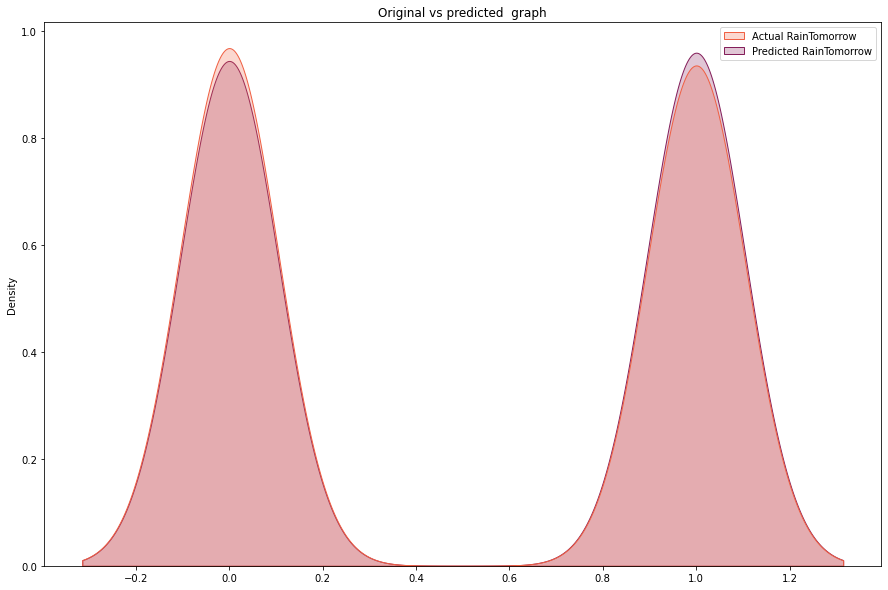

In [179]:
#Visulizing actual vs Predicted
plt.figure(figsize = (15,10))
sns.kdeplot(data = Rain, palette = 'rocket_r', gridsize = 900, shade = True)
plt.title('Original vs predicted  graph')
plt.show()

# Prediction for Rainfall

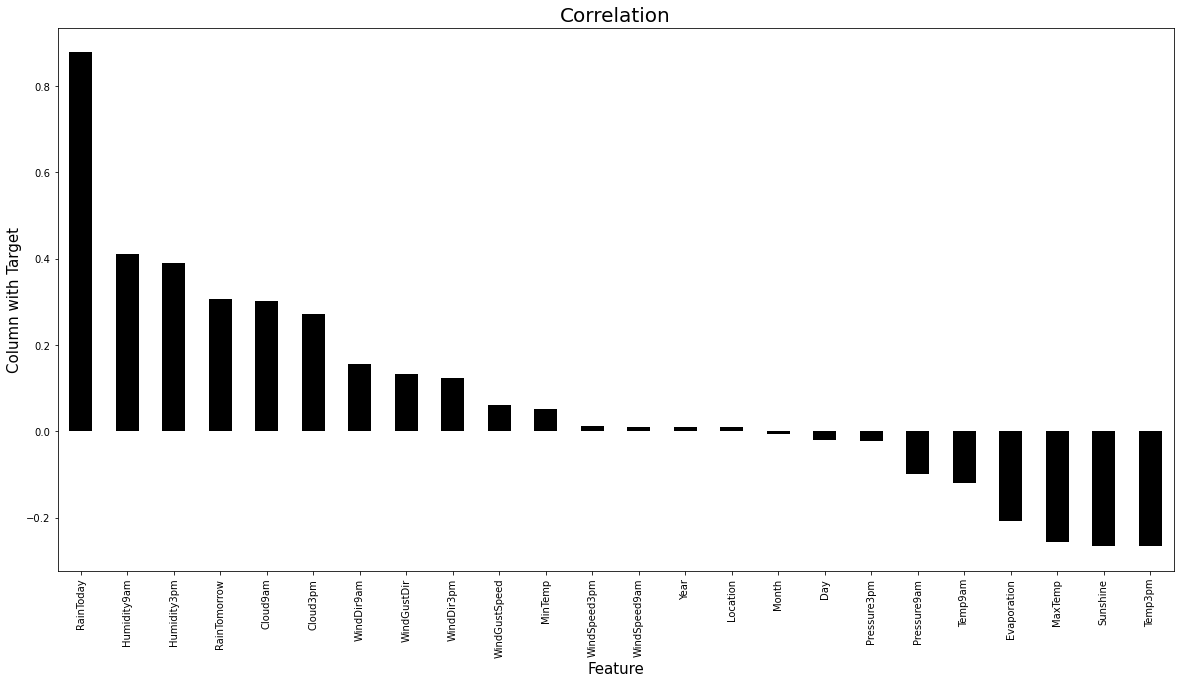

In [180]:
#Visualizing correlation
plt.figure(figsize = (20,10))
df_new.corr()['Rainfall'].sort_values(ascending = False).drop(['Rainfall']).plot(kind = 'bar', color = 'black')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Column with Target', fontsize = 15)
plt.title('Correlation', fontsize = 20)
plt.show()

# Spliting dataset into X and Y variable

In [181]:
x = df_new.drop('Rainfall', axis = 1)
y = df_new['Rainfall']

In [182]:
x.shape

(7987, 24)

In [183]:
y.shape

(7987,)

# Standardization

In [184]:
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)

In [185]:
x.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,-1.508427,0.056444,-0.145732,0.033069,-0.097439,1.229267,0.448790,1.250245,1.400214,0.785250,0.638072,0.184123,-1.624174,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.661315,1.634113,-1.671657
1,-1.508427,-1.058476,0.220676,0.033069,-0.097439,1.441960,0.448790,-0.277857,1.626597,-0.982717,0.421555,-1.455097,-1.457752,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.661315,1.634113,-1.557976
2,-1.508427,-0.036466,0.320605,0.033069,-0.097439,1.654654,0.593637,1.250245,1.626597,0.701237,0.854590,-1.819368,-1.180382,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-0.543635,-1.661315,1.634113,-1.444296
3,-1.508427,-0.724000,0.703668,0.033069,-0.097439,-0.684977,-1.250093,0.377044,-1.769138,-0.062332,-0.985811,-1.394385,-1.957019,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-0.543635,-1.661315,1.634113,-1.330616
4,-1.508427,0.818306,1.419829,0.033069,-0.097439,1.229267,0.224831,-1.369358,-0.184462,-0.540338,0.205037,0.851954,-1.013959,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-0.543635,-1.661315,1.634113,-1.216936


# Multicollinearity

In [186]:
# Checking VIF 
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif['features'] = x.columns

#Let's check the values
vif

,VIF values,features
0,1.598758,Location
1,8.836101,MinTemp
2,26.383221,MaxTemp
3,1.614206,Evaporation
4,2.088594,Sunshine
5,1.615749,WindGustDir
6,2.375417,WindGustSpeed
7,1.363027,WindDir9am
8,1.488535,WindDir3pm
9,1.992619,WindSpeed9am


In [187]:
#Droping Temp3pm
x.drop('Temp3pm', axis = 1, inplace = True)

In [188]:
# Checking VIF after removing Temp3pm
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif['features'] = x.columns

#Let's check the values
vif

,VIF values,features
0,1.597927,Location
1,8.794892,MinTemp
2,9.630057,MaxTemp
3,1.613926,Evaporation
4,2.088591,Sunshine
5,1.612452,WindGustDir
6,2.365753,WindGustSpeed
7,1.362063,WindDir9am
8,1.487574,WindDir3pm
9,1.992585,WindSpeed9am


In [189]:
#Droping Temp9am and Pressure9am
x = x.drop(columns = ['Temp9am', 'Pressure9am'], axis = 1)

In [190]:
# Checking VIF after removing Temp9am and Pressure9am
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif['features'] = x.columns

#Let's check the values
vif

,VIF values,features
0,1.595702,Location
1,4.539129,MinTemp
2,5.497320,MaxTemp
3,1.593545,Evaporation
4,2.070634,Sunshine
5,1.596142,WindGustDir
6,2.302423,WindGustSpeed
7,1.340122,WindDir9am
8,1.418801,WindDir3pm
9,1.967571,WindSpeed9am


* Multicollinearity problem have been take care off.

# PCA - Principle Component Analysis

In [191]:
pca = PCA()
principle_comp = pca.fit_transform(x)

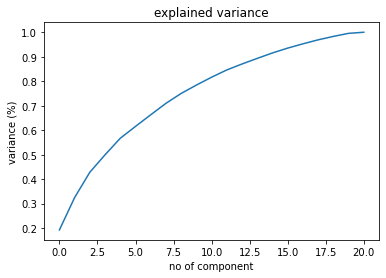

In [192]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

* Graph shows 18 components has explained 98% - 99% variance of all features, so will use 18.

In [193]:
pca = PCA(n_components = 18)
x = pca.fit_transform(x)
x

array([[ 0.12882285,  0.80051747, -2.65646453, ..., -0.91477886,
        -0.48514585, -0.68123721],
       [ 0.88529577, -0.58152856, -2.61692677, ...,  0.20829054,
        -0.39894462,  0.54972181],
       [ 1.51378111,  0.45991824, -3.54930938, ..., -0.78033959,
         0.07593408,  0.14577552],
       ...,
       [ 0.84323984, -1.09233779, -0.33604736, ..., -0.31831078,
        -0.75891425,  0.03181941],
       [ 1.42063717, -1.65855664, -0.01272886, ..., -0.70926258,
         0.51122435,  0.19420523],
       [ 0.28307351,  0.54995467,  1.64815672, ...,  0.23478098,
        -0.0789659 , -0.87061366]])

In [194]:
#Train Test Split / finding best random_state for my model
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x, y ,random_state = i,test_size = 0.2)
    LR.fit(x_train,y_train)
    train_pred = LR.predict(x_train)
    test_pred = LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2) == round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X' * 50,'\n')

At random state  4 The model performance very well
At random state:  4
Test R2 score is:  0.79
Train R2 score is:  0.79
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  5 The model performance very well
At random state:  5
Test R2 score is:  0.79
Train R2 score is:  0.79
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  7 The model performance very well
At random state:  7
Test R2 score is:  0.79
Train R2 score is:  0.79
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  10 The model performance very well
At random state:  10
Test R2 score is:  0.79
Train R2 score is:  0.79
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  14 The model performance very well
At random state:  14
Test R2 score is:  0.79
Train R2 score is:  0.79
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  15 The model performance very well
At random state:  15
Test R2 score is:  0.79
Train R2 score is:  0.79
XXXXXXXXX

In [195]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(x, y,random_state = 98,test_size = 0.2)
LR.fit(x_train,y_train)

LinearRegression()

In [196]:
#Regression models
LR_model = LinearRegression()
RD_model = Ridge()
LS_model = Lasso()
DT_model = DecisionTreeRegressor()
SV_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
XGB_model = XGBRegressor()
Elastic_model = ElasticNet()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
ADA_model = AdaBoostRegressor()
GB_model = GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]

In [197]:
#Checking R2, MAE, MSE, RMSE and CV score for all model
for m in model:
    m.fit(x_train,y_train)
    print('MAE of ',m ,'model', mean_absolute_error(y_test, m.predict(x_test)))
    print('MSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test)))
    print('RMSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test), squared = False))
    print('Training R2 Score of',m,'model', r2_score(y_train, m.predict(x_train)) * 100)
    print('Test R2 Score of',m,'model', r2_score(y_test, m.predict(x_test)) * 100)
    print("cross Validation score of ", m," is ",cross_val_score(m, x, y, cv = 10).mean())
    print('X' * 50, '\n\n')

MAE of  LinearRegression() model 0.2647791995519034
MSE of LinearRegression() model 0.1709414668669643
RMSE of LinearRegression() model 0.4134506825087658
Training R2 Score of LinearRegression() model 78.79047678926847
Test R2 Score of LinearRegression() model 78.84257598140846
cross Validation score of  LinearRegression()  is  0.7841090648548251
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  Ridge() model 0.26480687099853706
MSE of Ridge() model 0.1709411589651212
RMSE of Ridge() model 0.4134503101524066
Training R2 Score of Ridge() model 78.79047488751218
Test R2 Score of Ridge() model 78.84261409041717
cross Validation score of  Ridge()  is  0.7841088800021091
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  Lasso() model 0.8239409641930371
MSE of Lasso() model 0.8081162554988205
RMSE of Lasso() model 0.8989528661163613
Training R2 Score of Lasso() model 0.0
Test R2 Score of Lasso() model -0.020542629432984683
cross Validation score of  Lasso()  is  -0.01

MAE of  AdaBoostRegressor() model 0.6487270689610737
MSE of AdaBoostRegressor() model 0.4465223953449878
RMSE of AdaBoostRegressor() model 0.6682233124824274
Training R2 Score of AdaBoostRegressor() model 45.17068924168408
Test R2 Score of AdaBoostRegressor() model 44.73392661674399
cross Validation score of  AdaBoostRegressor()  is  0.420265662533705
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  GradientBoostingRegressor() model 0.283955132510003
MSE of GradientBoostingRegressor() model 0.1872110929526007
RMSE of GradientBoostingRegressor() model 0.43267897216365936
Training R2 Score of GradientBoostingRegressor() model 81.19272014604087
Test R2 Score of GradientBoostingRegressor() model 76.82888448790068
cross Validation score of  GradientBoostingRegressor()  is  0.7636697075039234
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 




* Will choose Random Forest Regressor as my best model because it has the minium difference between training and testing score, lowest MAE, MSE, RMSE and CV values.

# Hyper Parameter Tuning for Random Forest Regressor

In [198]:
#Let's tune the parameters using GridsearchCv
params = {'n_estimators': [20,100,200],
          'max_depth': [None, 1, 2, 5],
          'max_features': [0.5, 1, 'auto', 'sqrt'],
          'min_samples_split': [2, 5, 10],
          }

GCV = GridSearchCV(RFR_model, params, cv = 10, scoring = 'r2', n_jobs = -1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 5],
                         'max_features': [0.5, 1, 'auto', 'sqrt'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 100, 200]},
             scoring='r2')

In [199]:
GCV.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_split': 2,
 'n_estimators': 200}

In [200]:
Tuned_RFR_model = GCV.best_estimator_
GCV_pred = Tuned_RFR_model.predict(x_test)
r2_score(y_test, GCV_pred)

0.8304835832891341

* We have successfully tuned the model as R2 score have incraesed from 82% to 83%. Will save the tuned model and use it predict capacity_mw.

# Saving Model

In [201]:
#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(Tuned_RFR_model, open('RF_model', 'wb'))

In [202]:
#Loading saved model
loaded_model = pickle.load(open('RF_model','rb'))

In [203]:
#Prediction using saved model
RF = loaded_model.predict(x_test)
RF

array([-0.75369927, -1.05472065, -0.89054795, ..., -0.27912595,
        0.96717632, -0.69237671])